In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
data = pd.read_csv("cyberbullying_tweets.csv")
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [3]:
grouped = data.groupby("cyberbullying_type")

print(f"Total Number of Observations: {data.shape[0]}")
print(f"Total Obs per {grouped.size()}")

Total Number of Observations: 47692
Total Obs per cyberbullying_type
age                    7992
ethnicity              7961
gender                 7973
not_cyberbullying      7945
other_cyberbullying    7823
religion               7998
dtype: int64


In [4]:
classes = data['cyberbullying_type'].unique()
classes

array(['not_cyberbullying', 'gender', 'religion', 'other_cyberbullying',
       'age', 'ethnicity'], dtype=object)

### Visualization

In [5]:
grouped.size()

cyberbullying_type
age                    7992
ethnicity              7961
gender                 7973
not_cyberbullying      7945
other_cyberbullying    7823
religion               7998
dtype: int64

In [6]:
classes = ["age", "ethnicity", "gender", "not_cyberbullying", "other_cyberbullying", "religion"]

In [7]:
sizes = []
for i in range(len(grouped)):
    sizes.append(grouped.size()[i])

<BarContainer object of 6 artists>

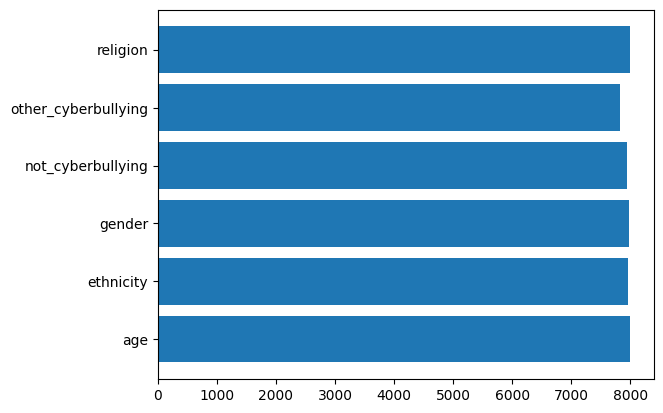

In [8]:
plt.barh(classes, sizes)

### Outline


### Preprocessing

In [9]:
# Remove empty
data = data.dropna()
# There are no empty values to remove

In [10]:
# Remove Duplicates
print(data.shape[0])
print(data["tweet_text"].duplicated().any())
data = data.drop_duplicates(subset=["tweet_text"])
print(data.shape[0])

47692
True
46017


In [11]:
# Remove empty row
data = data.drop(307)
print(data.shape[0])

46016


In [12]:
# Lowercase
data["tweet_text"] = data["tweet_text"].apply(lambda x: x.lower())

# Tokenize
data["tweet_text"] = data["tweet_text"].apply(lambda x: word_tokenize(x))

# Remove non-alphanum & single-char
data["tweet_text"] = data["tweet_text"].apply(lambda x: [word for word in x if word.isalnum()])
data["tweet_text"] = data["tweet_text"].apply(lambda x: [word for word in x if len(word)>1])

# Remove stop words
stop_words = set(stopwords.words('english'))
data["tweet_text"] = data["tweet_text"].apply(lambda x: [word for word in x if word not in stop_words])

In [13]:
# Lemmatize
lemmitizer = WordNetLemmatizer()
data["tweet_text"] = data["tweet_text"].apply(lambda x: [lemmitizer.lemmatize(word) for word in x])

# In case these things change with lemmatization
data["tweet_text"] = data["tweet_text"].apply(lambda x: [word for word in x if word.isalnum()])
data["tweet_text"] = data["tweet_text"].apply(lambda x: [word for word in x if len(word)>1])

In [14]:
data.head(10)

,tweet_text,cyberbullying_type
0,"[word, katandandre, food, crapilicious, mkr]",not_cyberbullying
1,"[aussietv, white, mkr, theblock, imacelebritya...",not_cyberbullying
2,"[xochitlsuckkks, classy, whore, red, velvet, c...",not_cyberbullying
3,"[meh, thanks, head, concerned, another, angry,...",not_cyberbullying
4,"[rudhoeenglish, isi, account, pretending, kurd...",not_cyberbullying
5,"[raja5aab, quickieleaks, yes, test, god, good,...",not_cyberbullying
6,"[itu, sekolah, ya, bukan, tempat, bully, ga, j...",not_cyberbullying
7,"[karma, hope, bite, kat, butt, nasty, mkr]",not_cyberbullying
8,"[stockputout, everything, mostly, priest]",not_cyberbullying
9,"[rebecca, black, drop, school, due, bullying]",not_cyberbullying


In [15]:
data.to_csv("cleaned.csv")

In [22]:
data['cyberbullying_type'].value_counts()

religion               7995
age                    7992
ethnicity              7952
not_cyberbullying      7936
gender                 7898
other_cyberbullying    6243
Name: cyberbullying_type, dtype: int64

Text(0.5, 1.0, 'Class Distribution (After Removing Duplicates)')

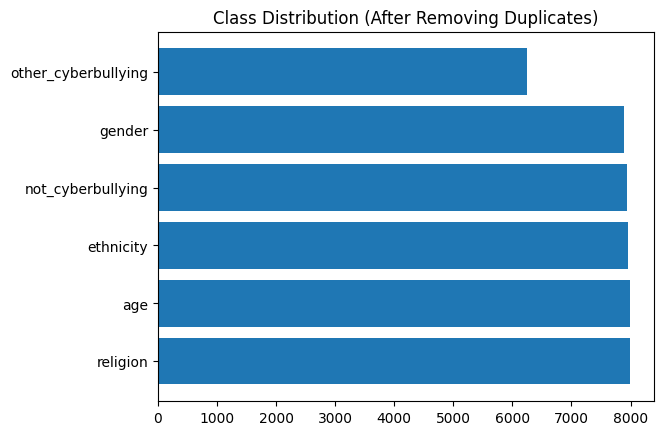

In [23]:
classes = ["religion", "age", "ethnicity", "not_cyberbullying", "gender", "other_cyberbullying", ]
plt.barh(classes, data['cyberbullying_type'].value_counts())
plt.title("Class Distribution (After Removing Duplicates)")

In [17]:
from wordcloud import WordCloud

In [18]:
classes

['age',
 'ethnicity',
 'gender',
 'not_cyberbullying',
 'other_cyberbullying',
 'religion']

In [38]:
subset1 = data[data['cyberbullying_type']=="gender"]
text_gender = subset1["tweet_text"].values
type(subset1["tweet_text"].iloc[1])

list

In [40]:
# Flatten the list of strings into a single list of words
flattened_text = [' '.join(tweet) if isinstance(tweet, list) else tweet for tweet in text_gender]

# Join all the words into a single string
text_gender_combined = ' '.join(flattened_text)

# Generate the WordCloud
wc1 = WordCloud(collocations=False, background_color='white', colormap='Dark2', width=2000, height=1000).generate(text_gender_combined)


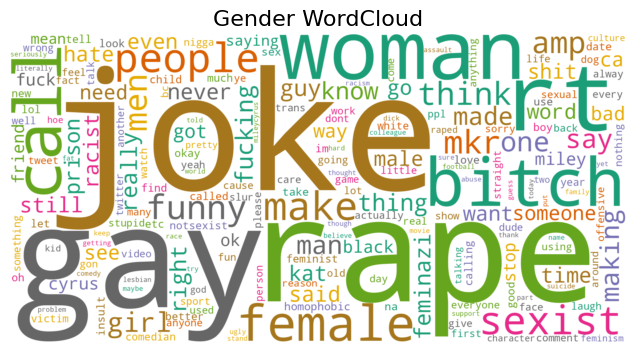

In [44]:
plt.figure(figsize=(8, 4))
plt.axis('off')
plt.title("Gender WordCloud", fontsize=16)
plt.imshow(wc1, interpolation='bilinear')

In [50]:
subset2 = data[data['cyberbullying_type']=="age"]
text_age = subset1["tweet_text"].values

flattened_text = [' '.join(tweet) if isinstance(tweet, list) else tweet for tweet in text_age]
text_age_combined = ' '.join(flattened_text)
wc2 = WordCloud(collocations=False, background_color='white', colormap='Dark2', width=2000, height=1000).generate(text_age_combined)

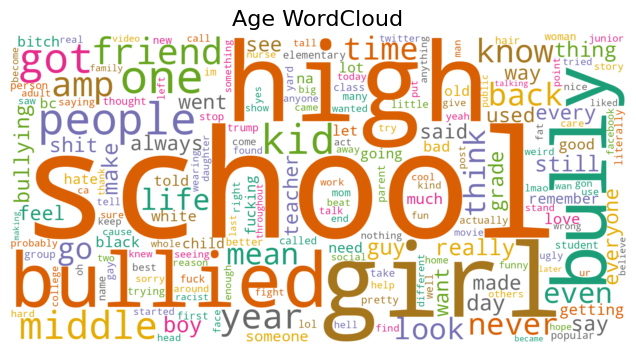

In [51]:
plt.figure(figsize=(8, 4))
plt.axis('off')
plt.title("Age WordCloud", fontsize=16)
plt.imshow(wc2, interpolation='bilinear')

In [52]:
subset3 = data[data['cyberbullying_type']=="religion"]
text_religion = subset3["tweet_text"].values

flattened_text = [' '.join(tweet) if isinstance(tweet, list) else tweet for tweet in text_religion]
text_religion_combined = ' '.join(flattened_text)
wc3 = WordCloud(collocations=False, background_color='white', colormap='Dark2', width=2000, height=1000).generate(text_religion_combined)

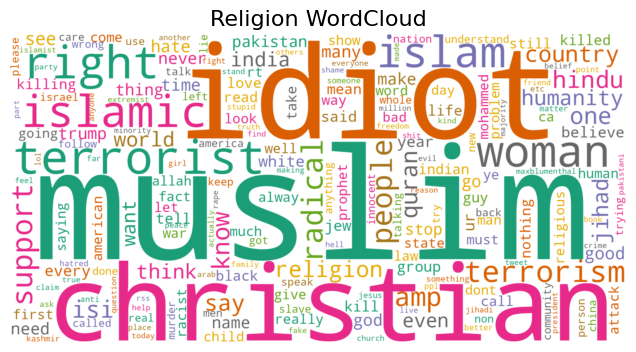

In [53]:
plt.figure(figsize=(8, 4))
plt.axis('off')
plt.title("Religion WordCloud", fontsize=16)
plt.imshow(wc3, interpolation='bilinear')

In [54]:
subset4 = data[data['cyberbullying_type']=="ethnicity"]
text_ethnicity = subset4["tweet_text"].values

flattened_text = [' '.join(tweet) if isinstance(tweet, list) else tweet for tweet in text_ethnicity]
text_ethnicity_combined = ' '.join(flattened_text)
wc4 = WordCloud(collocations=False, background_color='white', colormap='Dark2', width=2000, height=1000).generate(text_ethnicity_combined)

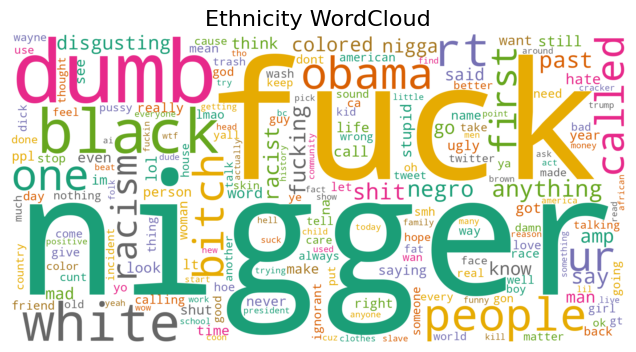

In [55]:
plt.figure(figsize=(8, 4))
plt.axis('off')
plt.title("Ethnicity WordCloud", fontsize=16)
plt.imshow(wc4, interpolation='bilinear')

In [56]:
subset5 = data[data['cyberbullying_type']=="not_cyberbullying"]
text_not_cyberbullying = subset5["tweet_text"].values

flattened_text = [' '.join(tweet) if isinstance(tweet, list) else tweet for tweet in text_not_cyberbullying]
text_not_cyberbullying_combined = ' '.join(flattened_text)
wc5 = WordCloud(collocations=False, background_color='white', colormap='Dark2', width=2000, height=1000).generate(text_not_cyberbullying_combined)

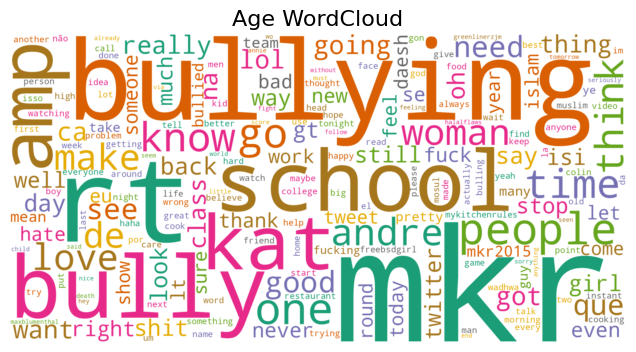

In [ ]:
plt.figure(figsize=(8, 4))
plt.axis('off')
plt.title("Not Cyberbullying WordCloud", fontsize=16)
plt.imshow(wc5, interpolation='bilinear')